In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
!pip install xgboost


                                              0.0/124.9 MB ? eta -:--:--
                                              0.0/124.9 MB ? eta -:--:--
                                            0.0/124.9 MB 435.7 kB/s eta 0:04:47
                                            0.1/124.9 MB 762.6 kB/s eta 0:02:44
                                              0.4/124.9 MB 2.9 MB/s eta 0:00:43
                                              0.7/124.9 MB 3.6 MB/s eta 0:00:35
                                              1.1/124.9 MB 4.5 MB/s eta 0:00:28
                                              1.4/124.9 MB 5.0 MB/s eta 0:00:25
                                              1.4/124.9 MB 5.0 MB/s eta 0:00:25
                                              1.7/124.9 MB 4.4 MB/s eta 0:00:29
                                              2.1/124.9 MB 4.7 MB/s eta 0:00:27
                                              2.4/124.9 MB 5.0 MB/s eta 0:00:25
                                              2.6/124.

In [5]:
df = pd.read_csv("creditcard.csv")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
#Data Preprocessing
# Standardize 'Amount' and 'Time' features
scaler = StandardScaler()
df[['Amount', 'Time']] = scaler.fit_transform(df[['Amount', 'Time']])

In [10]:
# Define independent variables (features) and dependent variable (target)
X = df.drop('Class', axis=1)
y = df['Class']

In [11]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

In [14]:
# Storage for model metrics
model_metrics = {'Model': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'AUC-ROC': []}


In [15]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test))
    model_metrics['Model'].append(name)
    model_metrics['Precision'].append(precision_score(y_test, y_pred))
    model_metrics['Recall'].append(recall_score(y_test, y_pred))
    model_metrics['F1-Score'].append(f1_score(y_test, y_pred))
    model_metrics['AUC-ROC'].append(auc_score)

In [19]:
# Results summary in DataFrame
results_df = pd.DataFrame(model_metrics)
results_df.head()

,Model,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,0.877551,0.632353,0.735043,0.978359
1,Random Forest,0.925000,0.816176,0.867188,0.958254
2,XGBoost,0.932773,0.816176,0.870588,0.985984


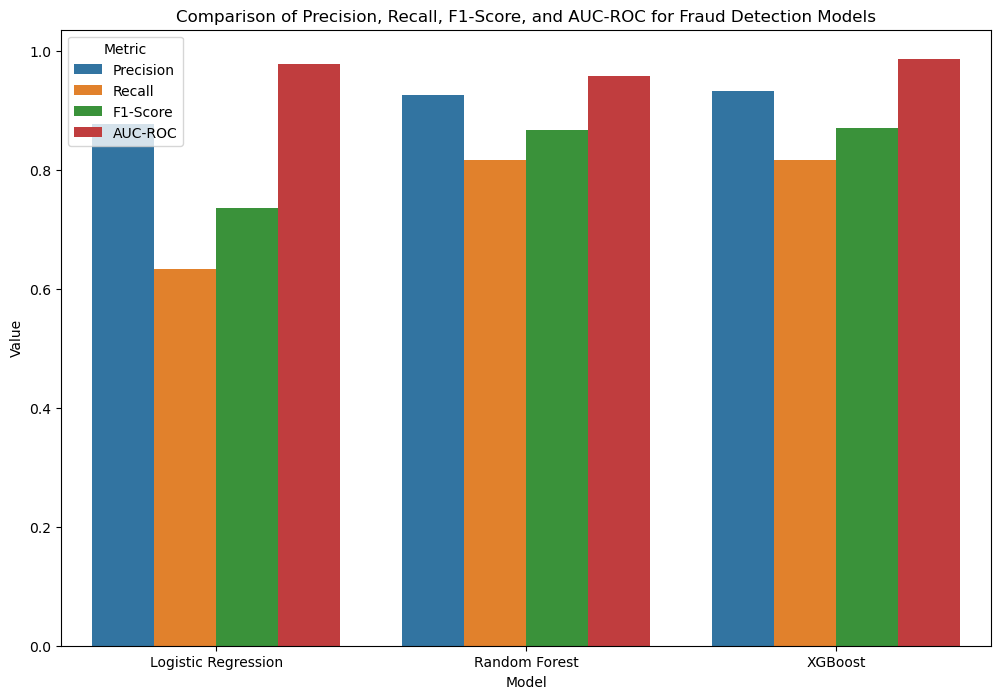

In [17]:
plt.figure(figsize=(12, 8))
metrics_melted = pd.melt(results_df, id_vars='Model', var_name='Metric', value_name='Value')
sns.barplot(data=metrics_melted, x='Model', y='Value', hue='Metric')
plt.title('Comparison of Precision, Recall, F1-Score, and AUC-ROC for Fraud Detection Models')
plt.show()

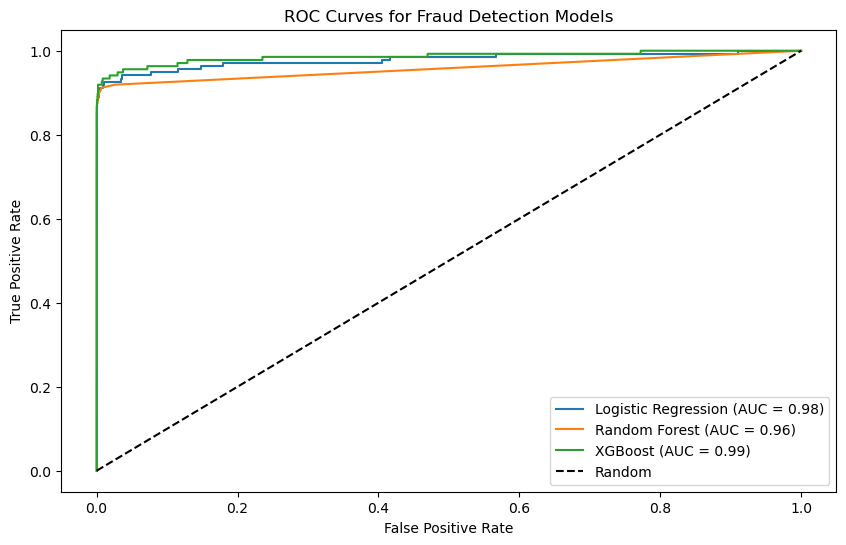

In [18]:
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_scores = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_scores):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Fraud Detection Models')
plt.legend()
plt.show()

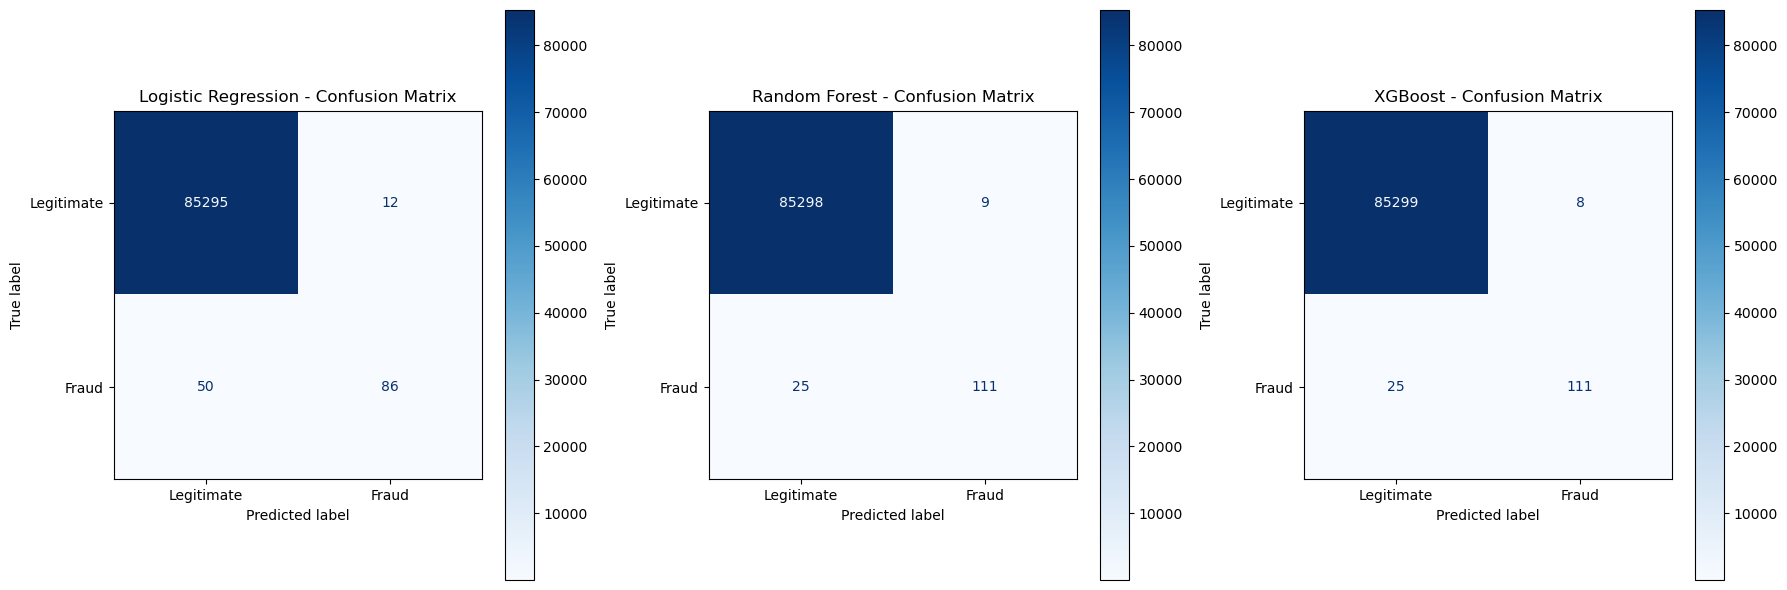

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix visualization for each model
plt.figure(figsize=(18, 6))
for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)
    plt.subplot(1, 3, i)
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Legitimate', 'Fraud']).plot(cmap='Blues', ax=plt.gca())
    plt.title(f'{name} - Confusion Matrix')

plt.tight_layout()
plt.show()